# Lab 2
## W203: Statistics for Data Science

- **Term: Spring 2019**

- **Group Members: Kai Qi Lim, Youzhi (Chloe) Wu**

- **Section Number: 05**

In [4]:
A = read.csv("anes_pilot_2018.csv")

# Research Questions

## Question 1: Do US voters have more respect for the police or for journalists?

### Introduction  (5 points)

> - We would use *ftpolice* and *ftjournal* variables to compare respondents' rating on police and journalists. We assume that higher rating means respondents show more respect.  
- However we do acknowledge certain gaps: 
    - There are many emotions combined in a rating. It is likely that higher rating $\neq$ more respect. 
    - Higher rating does not necessarily mean more respect; vice versa, lower rating does not necessarily mean less respect. It is possible that respondents who have higher respect for journalists than police give lower rating because they feel that journalists on average earn less than police, or that police tends to have better retirement package than journalist, etc. 
    - The rating results may not carry consistent meaning across all respondents or even within the same respondent. It is possible that a respondent may apply different criteria when assigning score to different objects. Then, the rating scores may fail to serve as a consistent measure of respect. 
    - Respondents may not provide truthful or accurate rating when answering the survey. In follow-on sections, we have found that there are respondents who do not always answer honestly in this survey. It is possible that the rating for police and journalist are not all reliable and truely represent respondents' view / respect for police and journalist. 
- Throughout this report, we do not assume causality in our analysis. Also, the analysis only pertains to the population of YouGov participants, it does not represent the entire US voters population. 

### Exploratory data analysis (EDA) of the relevant variables. (5 points)

> **1. Sanity Checks:**
- The range of rating for police (*ftpolice*) is 0 to 100, with a median score of 70 and mean score of 64.68. 
- The range of rating for journalist (*ftjournal*) is -7 to 100, with a median score of 52 and a mean score of 52.26. 
- Based off the [Questionnaire Specifications](https://electionstudies.org/wp-content/uploads/2018/12/anes_pilot_2018_questionnaire.pdf), the rating is given by respondents by clicking on an interface of thermometer. Without actually taking the survey, it is hard to tell the minimum interval between each score. Is it by 1 degree or less? However, based on the results in dataset A, we could assume that these two variables are continuous. 
- In our dataset A, we observe two cases where -7 (no answer) is recorded for *ftjournal*. We assume that only scores ranging from 0 to 100 are considered valid rating. The two cases with -7 rating will be removed from our analysis. 
- We also calculated the correlation between *ftpolice* and *ftjournal*. The score is -0.0762 which is considered low.
- Codes we used to conduct basic sanity check are presented in a cell below. 

In [6]:
# Setting up
library(plyr)
# install.packages("effsize", dependencies = TRUE)
library(effsize)

#install.packages("gmodels")
library(gmodels)

#install.packages("ggplot2", dependencies = TRUE)
library(ggplot2)

In [7]:
# Basic data check
summary(A$ftpolice)
length(A$ftpolice)
summary(A$ftjournal)
length(A$ftjournal)

# Check the correlation of ftpolice and ftjournal
cor(A$ftpolice, A$ftjournal)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   47.00   70.00   64.68   90.00  100.00 

[1] 2500

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -7.00   21.00   52.00   52.26   82.00  100.00 

[1] 2500

[1] -0.07615407

> **2. Subset data:** 
- As argued in Step 1, we will remove the two cases with -7 for *ftjournal*. We would also omit them when considering the rating for police as there is no comparable scores between *ftjournal* and *ftpolice* for these two cases. 
- We also noticed that there is an *honest* variable in our dataset A, where respondent is asked to assign a subjective frequency of answering the questions honestly on this survey. There are 37 cases where respondents answered "Never" ("never answered the questions honestly on this survey"). There are 46 answering "Some of the time", 90 answering "About half the time", 215 answering "Most of the time", and 2112 answering "Always". In our analysis, we will remove cases where respondents answering "Never" in the *honest* variable. As for cases where *honest* values from 2 to 4, we will assume that they've answered honestly in our questions of interest, and therefore will keep them in our analysis. 
- After subsetting our data, we now have 2461 obervations of *ftjournal* and *ftpolice*.

In [8]:
# Get a count table for [honest] variable
count(A, "honest")

# Remove cases where [honest] == 1
A_honest = subset(A, honest != 1)

# Remove cases where ftjournal is -7
A_q1 = subset(A_honest, 0 <= ftjournal)

honest,freq
1,37
2,46
3,90
4,215
5,2112


> **3. Visualize data:** 
- For better comparison, we overlapped the histograms of *ftpolice* and *ftjournal*. 
- From the overlapped histogram, we observed that in the range of lower score (from 0 to 50), *ftjournal* tends to have more cases than *ftpolice*; whereas, in the range of higher score (from 50 to 100), *ftpolice* tends to have more cases than *ftjournal*. We also observed that the *ftpolice* tends to show right skewness, whereas the *ftjournal* tends to be more spread out than *ftpolice*.
- From the side-by-side boxplot, we observed that majority of *ftpolice* lies in the upper half of the score range (from 50 to 100), whereas *ftjournal* is relatively more spread out in terms of score range. 
- Again, we run a correlation check of these two variables, which is -0.088. We consider it as a low correlation. 

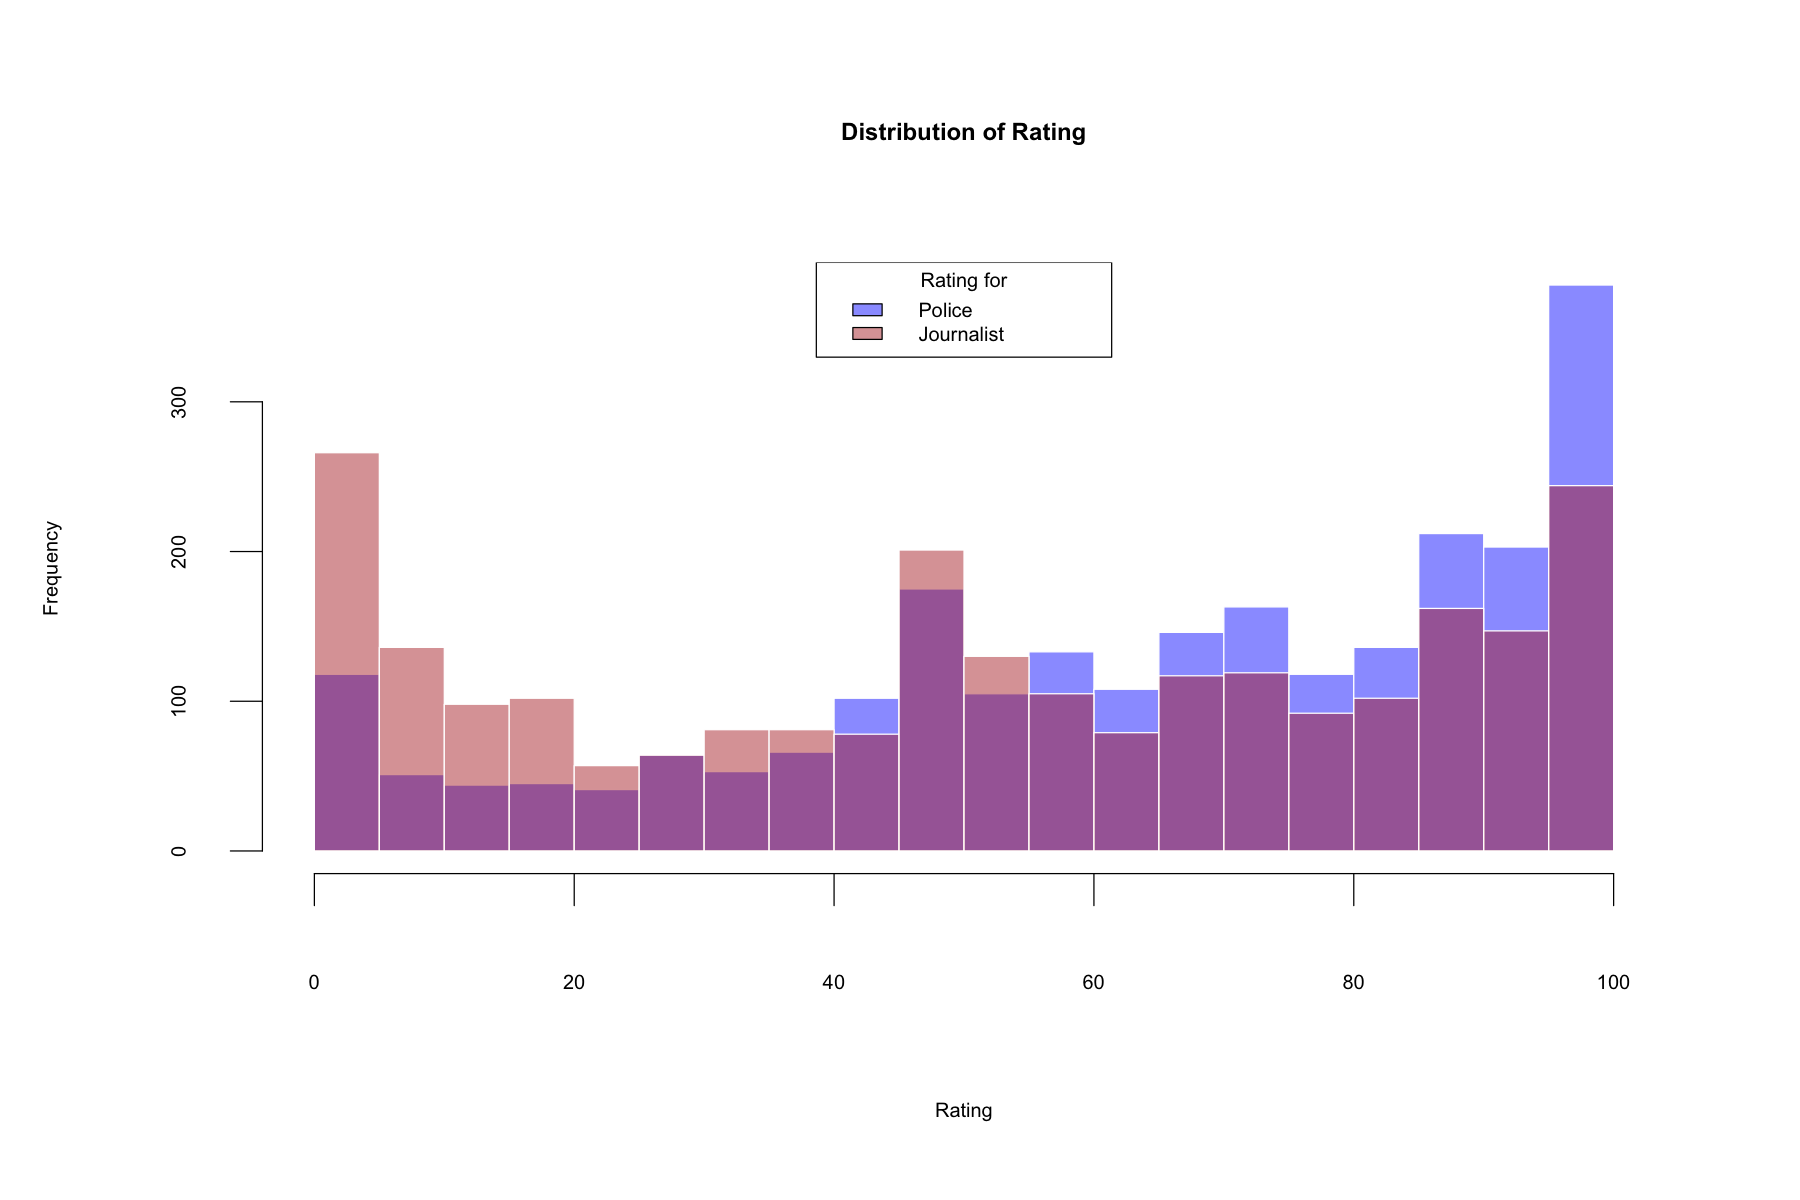

[1] -0.0882588

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   48.00   70.00   64.86   90.00  100.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   21.00   52.00   52.43   82.00  100.00 

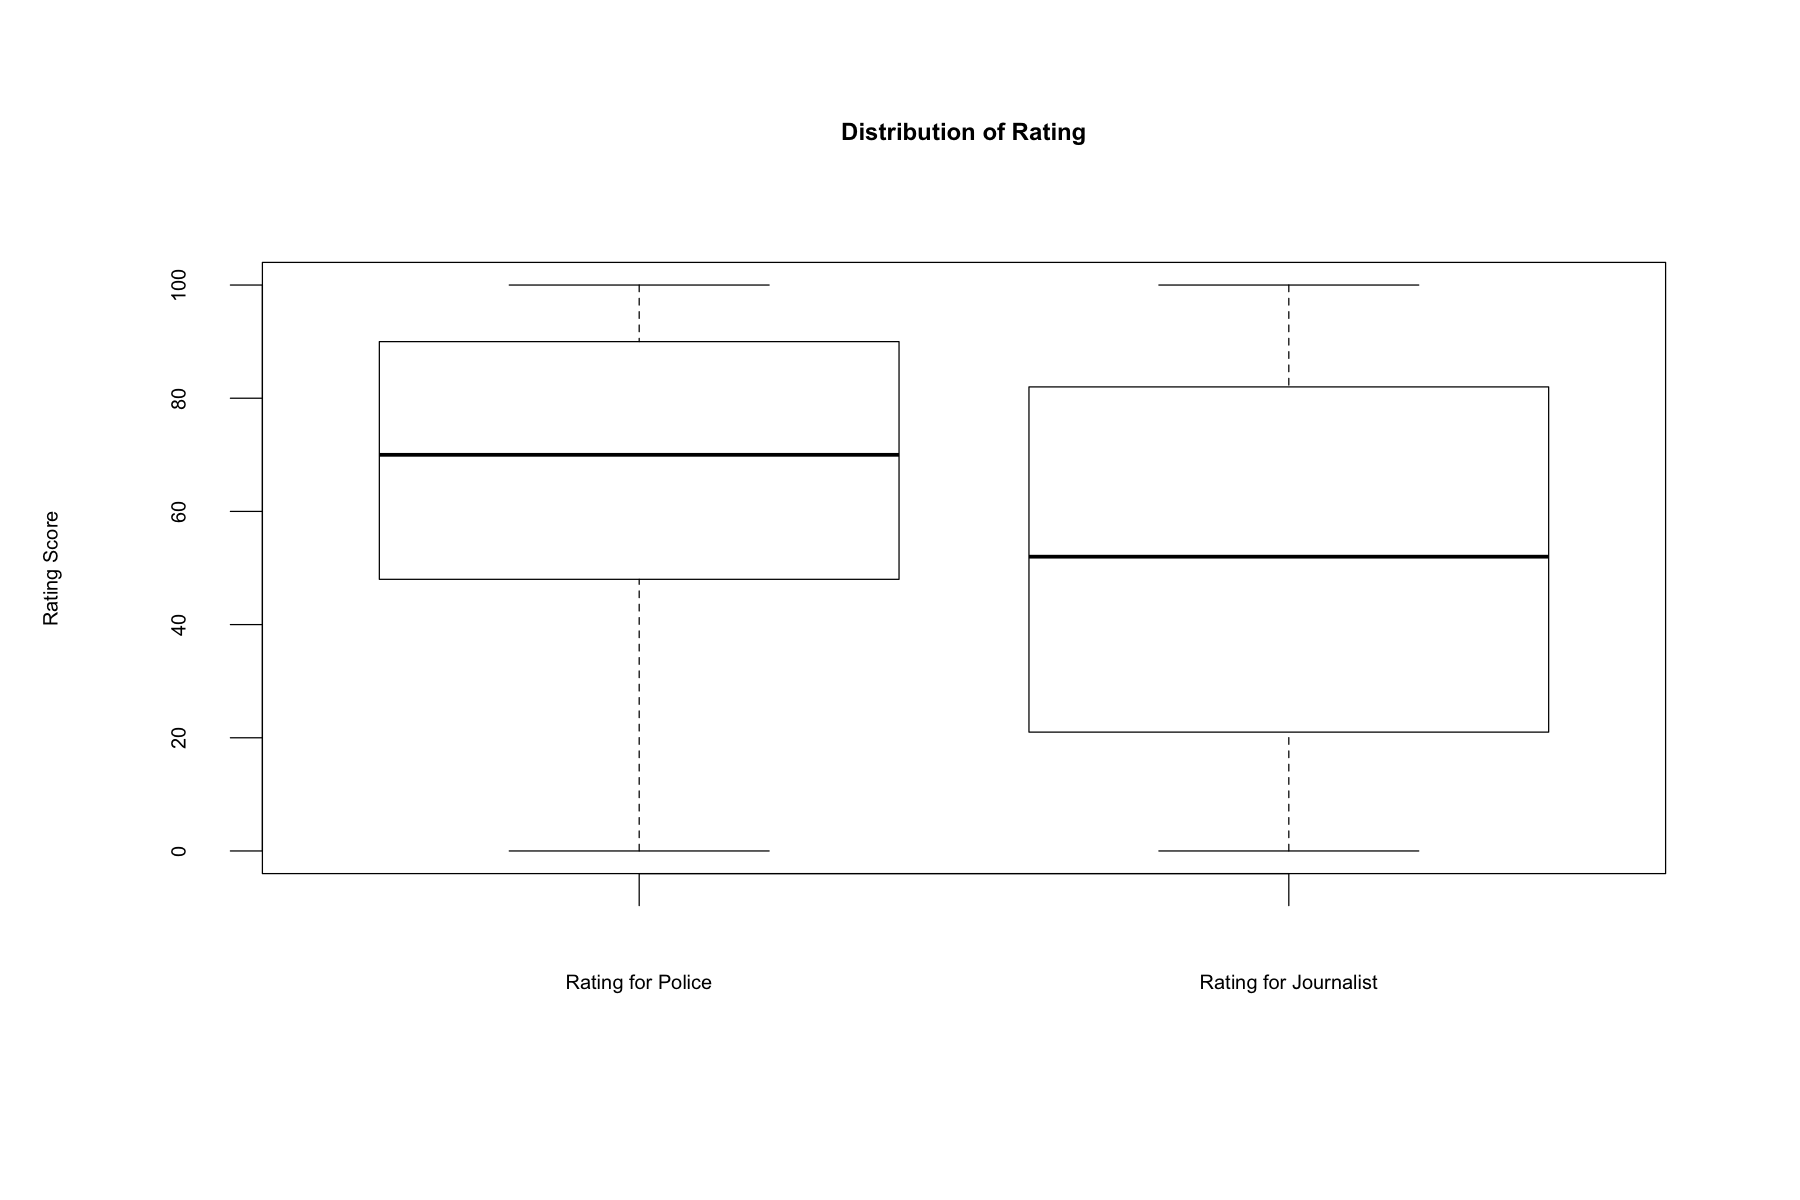

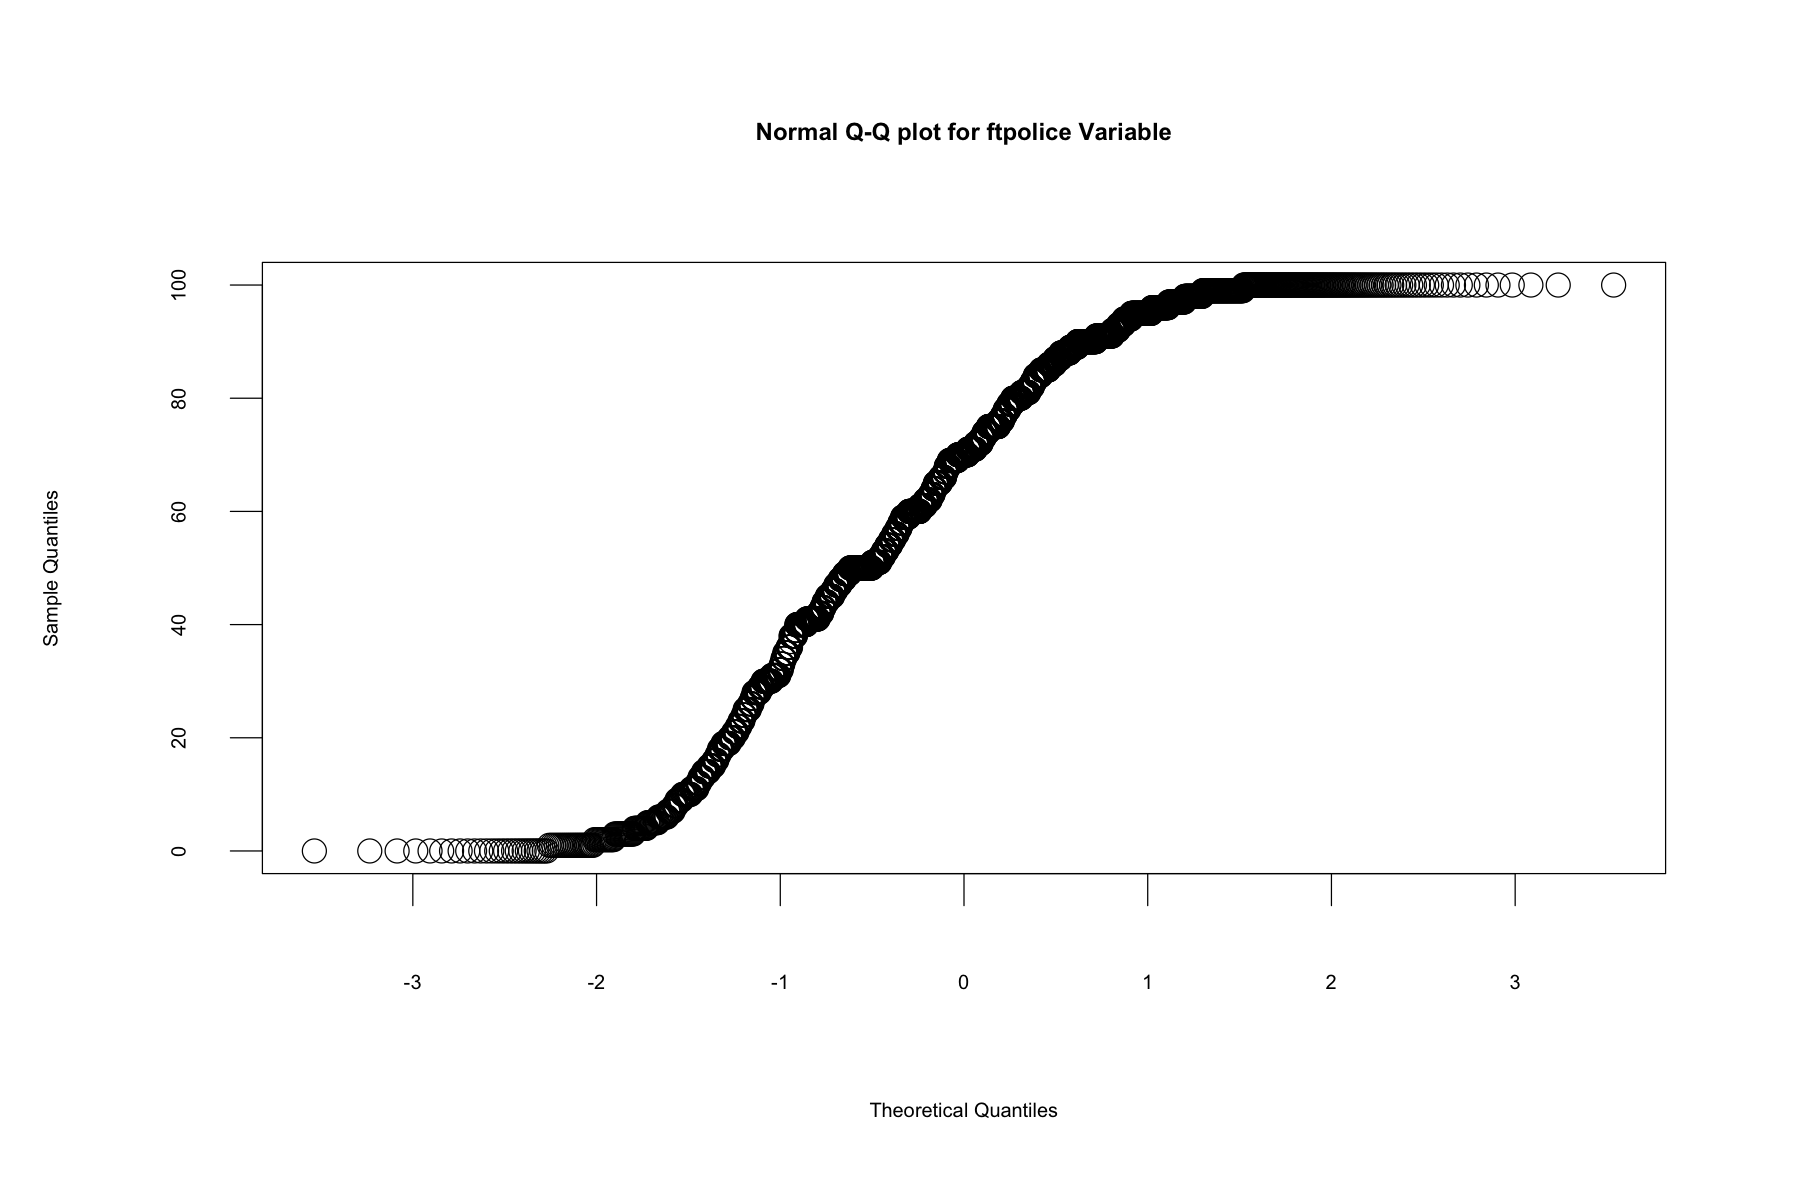

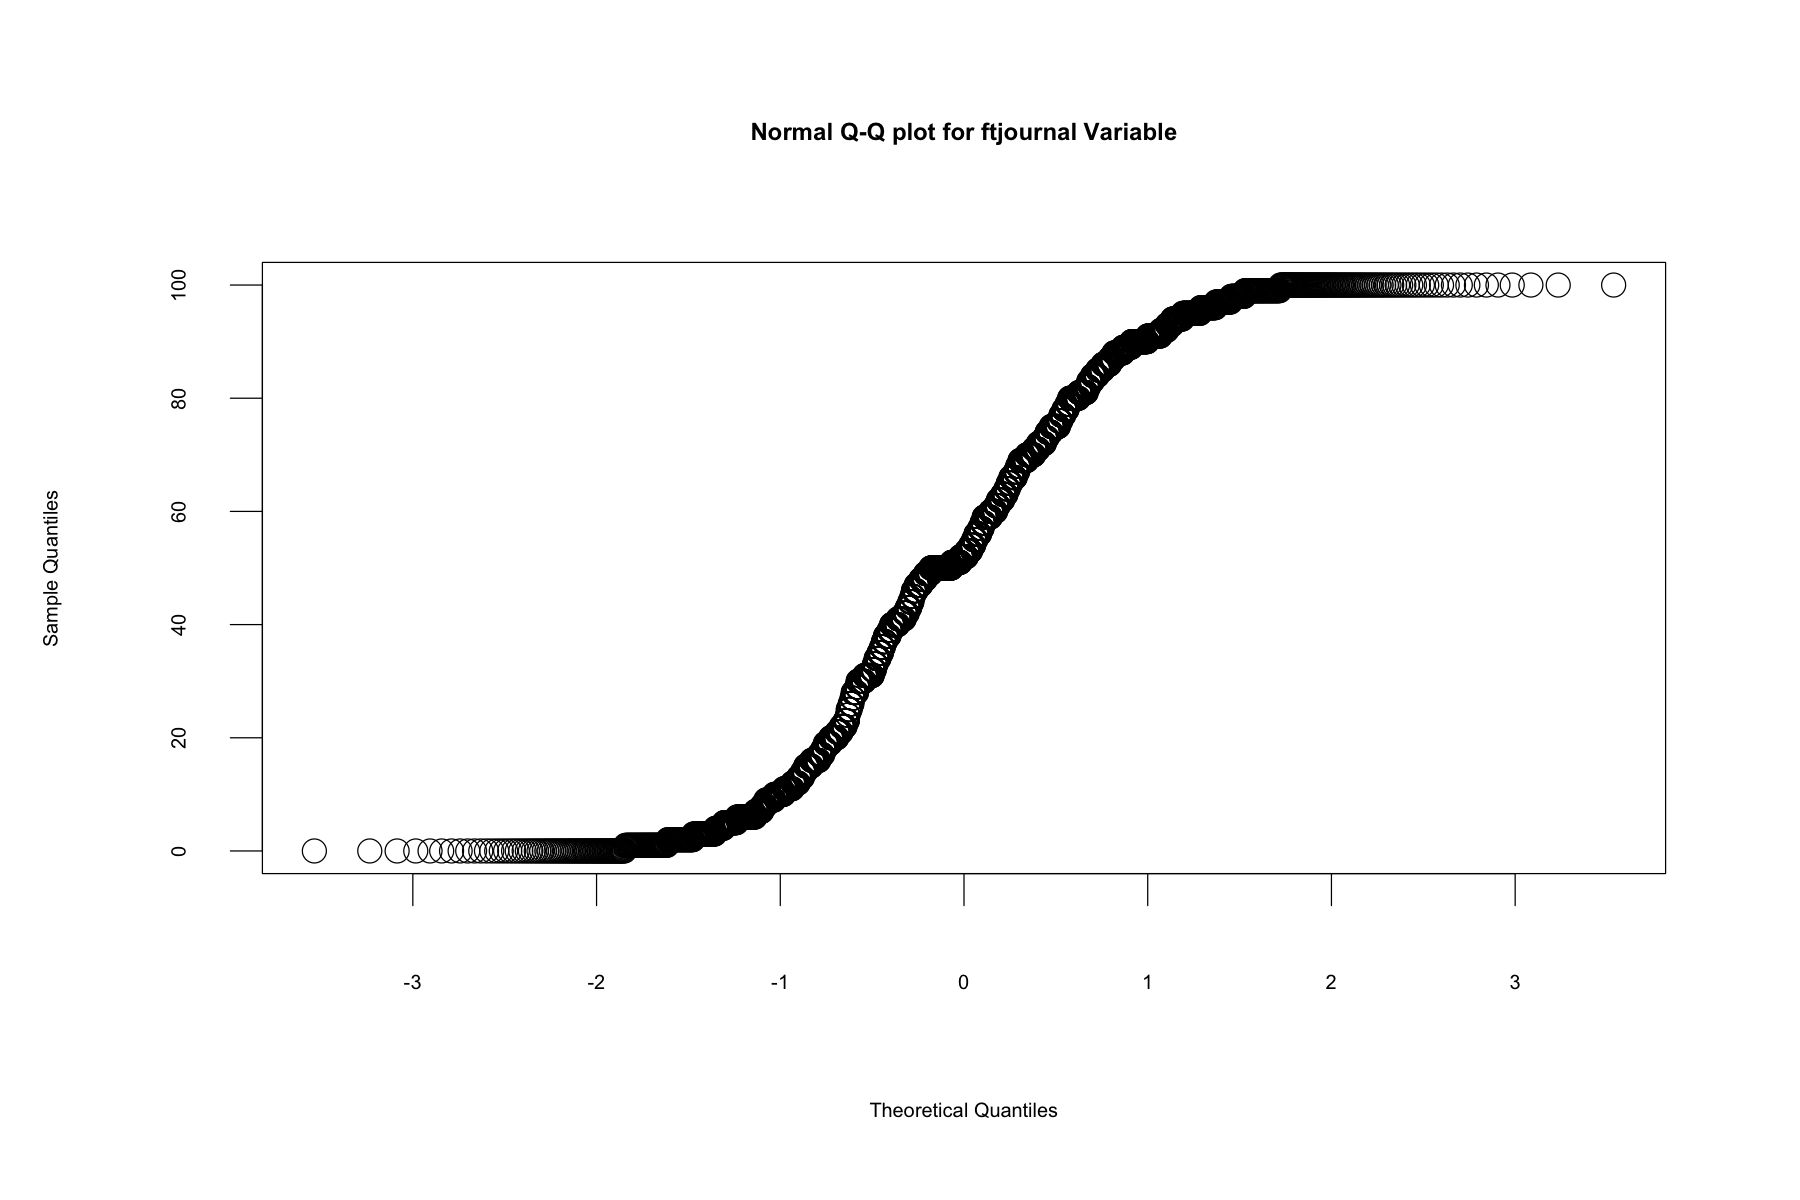

In [5]:
# Adjust figure size
options(repr.plot.height = 10, repr.plot.width = 15, repr.plot.pointsize = 32)

# Histogram
hist(A_q1$ftpolice, main = "Distribution of Rating", xlab = "Rating", 
     col = "#0000FF75", border = "white", breaks = 20)
hist(A_q1$ftjournal, add = T, col = "#B2222275", border = "white", breaks = 20)
legend("top", title = "Rating for", c("Police", "Journalist"), 
       fill = c("#0000FF75", "#B2222275"))

# Boxplot
boxplot(A_q1$ftpolice, A_q1$ftjournal, main = "Distribution of Rating",
        ylab = "Rating Score", names = c("Rating for Police", "Rating for Journalist"))

# Basic data check
cor(A_q1$ftpolice, A_q1$ftjournal)
summary(A_q1$ftpolice)
summary(A_q1$ftjournal)

# pull up a qq-plot to see how normal this variable looks
qqnorm(A_q1$ftpolice, main = "Normal Q-Q plot for ftpolice Variable")
qqnorm(A_q1$ftjournal, main = "Normal Q-Q plot for ftjournal Variable")

### Based on your EDA, select an appropriate hypothesis test.  (5 points)

>- As presented in previous sections, we have 2461 obervations for *ftjournal* and *ftpolice*. We consider that the sample sizes are sufficiently large for CLT to apply. 
- We assume that each respondent provided their rating independently, and therefore the *ftpolice* variable is i.i.d, and *ftjournal* is also i.i.d. We believe that the rating for police or journalist is determined by one's subjective view of the world and values. We do not see strong arguments to support the independency between these two ratings.    
- From the qqplots in above section, both plots show certain degree of diagonal line. Therefore, we may assume that the sample mean of both variables approximate normal distribution.  
- With the above considerations, we choose to run parametric paired two-tailed t-test. 
- Null hypothesis: There is no difference in the police rating and journalist rating;
- Alternative hypothesis: There is difference in the police rating and journalist rating.
- We decided to run two-tailed instead of one-tailed t-test in that we do not have strong arguments to eliminate the effects of one rating being lower than the other one. 

### Conduct your test. (5 points)

> - Based on our t-test, the p value is lower than significance level (0.05), showing statistical significance.  
- Based on the Cohen's d Effect Size, the practical significance is small. 
- Conclusion: If the conditions are met for the t-test to be valid, then as p-value is very low, we could reject null hypothesis of no difference between police rating and journalist rating. However, we find certain arguments against the necessary conditions for the test to be valid, such as (1) even though our sample size is relatively large (2,461), the sample distribution still displays certain skewness; (2) our assumption of *ftpolice* and *ftjournal* being i.i.d is not strongly supported; one could argue that some respondents may be affected by each other as they may be family or friends, etc. Therefore, we need caution in supporting our alternative hypothesis. 

In [6]:
# Run paired two-tailed t-test
t.test(A_q1$ftpolice, A_q1$ftjournal, paired = T)

# Calculate effect size
cohen.d(A_q1$ftpolice, A_q1$ftjournal)


	Paired t-test

data:  A_q1$ftpolice and A_q1$ftjournal
t = 13.653, df = 2460, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 10.64818 14.21975
sample estimates:
mean of the differences 
               12.43397 



Cohen's d

d estimate: 0.4059042 (small)
95 percent confidence interval:
    lower     upper 
0.3494442 0.4623642 

## Question 2: Are Republican voters older or younger than Democratic voters?

### Introduction  (5 points)

>- The variable birthyr would be used to compute age of participant in 2018. However, there are several variables to identify Democratic and Republican voters: *house18p, senate18p, gov18p* and *pid7x*. A further check would be conducted in the EDA to finalise the variable to use.

> Potential gaps:
- Clustering effect may be present since participants of this survey can earn rewards, indicating this may be a group of people who needs rewards, then the observations will tend to be similar. Since we are unable to find this out, for the purpose of this analysis, we will assume that there is no clustering.

### EDA of the relevant variables. (5 points)

>**1. Sanity checks**
* All variables will be checked for non-response codes: -1, -4 and -7.
* From the variable summary, pid7x had the least non-response, hence giving the largest dataset and would be used for analysis. We would identify the voters as follows:
    * Democrat: pid7x = 1, 2
    * Republican: pid7x = 6, 7
* It is noted that pid7x = 3 and 5 are independent voters with *some* inclination to either party. However, it is difficult to determine how much is the inclination and we would regard them as independent party voters.
* Following the procedure stated in question 1, data would be subset A_honest would be used to preserve response quality.

In [7]:
summary(A$honest < 0)
summary(A$birthyr < 0)
summary(A$house18p < 0)
summary(A$senate18p < 0)
summary(A$gov18p < 0)
summary(A$pid7x < 0)

   Mode   FALSE 
logical    2500 

   Mode   FALSE 
logical    2500 

   Mode   FALSE    TRUE 
logical    1743     757 

   Mode   FALSE    TRUE 
logical    1313    1187 

   Mode   FALSE    TRUE 
logical    1412    1088 

   Mode   FALSE    TRUE 
logical    2402      98 

> **2. Subset data**
- Non-response cases are first omitted. Then, a column is added to compute the age of participant in 2018. This dataset is then further divided into republican and democratic parties.
- The final dataset has 1456 data points, which is sufficient for CLT to apply.

In [9]:
# Remove cases where [honest] == 1
A_honest = subset(A, honest != 1)

# Remove non-response data points
A_party = subset(A_honest, pid7x > 0)

# Compute age of participant in 2018
A_party$age <- 2018 - A_party$birthyr

# Get only age and party
party = A_party[c('pid7x', 'age')]

# Sanity check
head(party)
summary(party)
length(party$age)

pid7x,age
6,32
6,46
3,19
4,43
6,29
2,26


     pid7x            age       
 Min.   :1.000   Min.   :18.00  
 1st Qu.:2.000   1st Qu.:36.00  
 Median :4.000   Median :52.00  
 Mean   :3.699   Mean   :50.16  
 3rd Qu.:6.000   3rd Qu.:63.00  
 Max.   :7.000   Max.   :91.00  

[1] 2377

In [10]:
# Subset into parties
democ = subset(party, pid7x %in% c(1, 2))
repub = subset(party, pid7x %in% c(6, 7))

dim(democ)
dim(repub)

[1] 854   2

[1] 602   2

> **3. Visualise data**
* Similar to question 1, histograms for the age of Democrat voters was overlapped with Republican voters for better visual comparison.
* It can be observed that the Democrat data tapers at the ends but has two peaks, one lower than the other. The Republican data tapers at the ends and is somewhat similar to the shape of a normal distribution but is skewed slightly to the right. The number of Republican voters is generally less than that of Democrat voters for most of the age brackets.
* From the boxplot and data summary, it can be seen that the mean and median age of Republican voters is slightly higher than that of Democrat voters with a smaller interquartile range.
* The correlation coefficient of 0.068 suggests that correlation is weak between choice of political party and age. Although correlation coefficient cannot be used to confirm dependence between variables, there is no further reason to suggest that they are related. For this analysis, we would assume choice of political party is independent of age.
* The qqplots showed strong diagonal shapes, indicating closeness to a normal distribution.

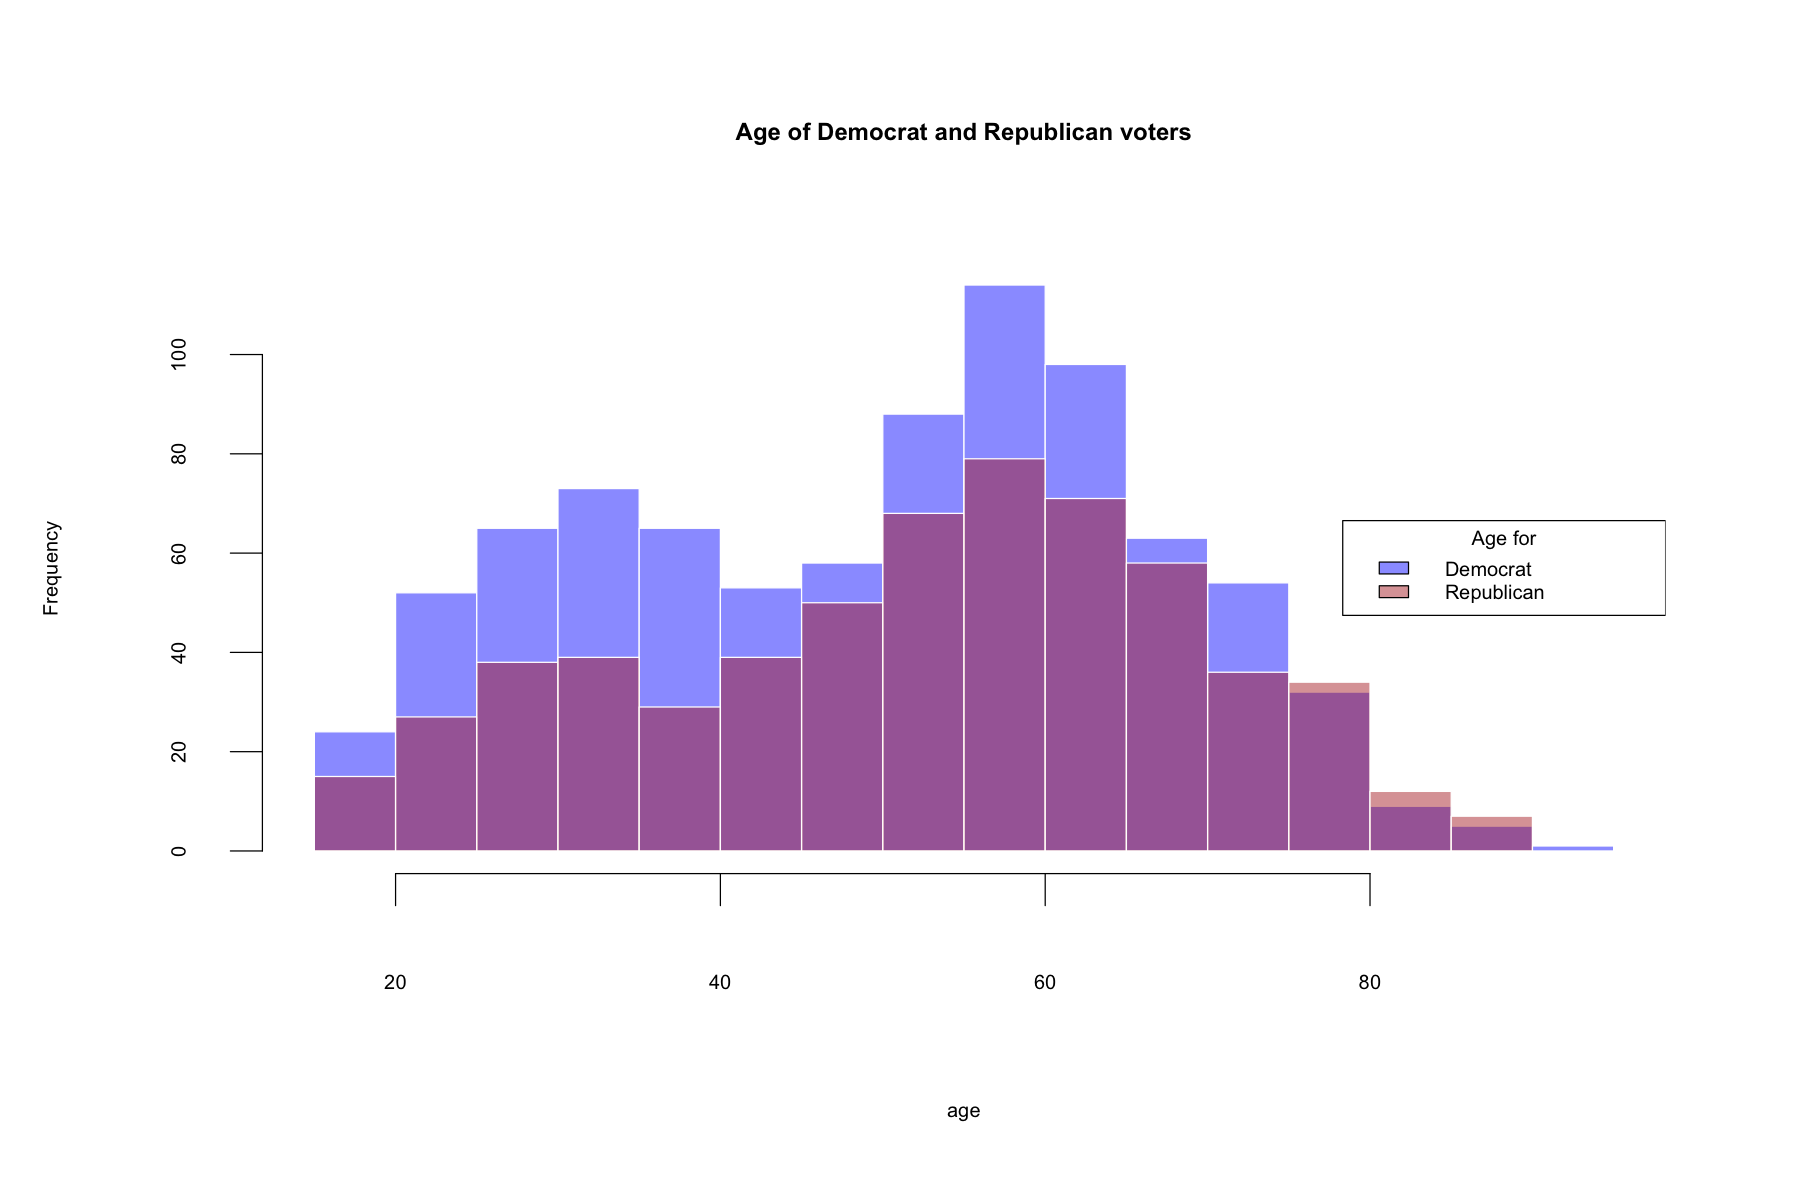

In [11]:
# Adjust figure size
options(repr.plot.height = 10, repr.plot.width = 15, repr.plot.pointsize = 32)

# Histogram 
hist(democ$age, main = "Age of Democrat and Republican voters", xlab = "age", 
     col = "#0000FF75", border = "white", breaks = 20)
hist(repub$age, add = T, col = "#B2222275", border = "white", breaks = 20)
legend("right", title = "Age for", c("Democrat", "Republican"), 
       fill = c("#0000FF75", "#B2222275"))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   35.25   53.00   50.22   63.00   91.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     18      41      55      53      65      90 

[1] 0.06803482

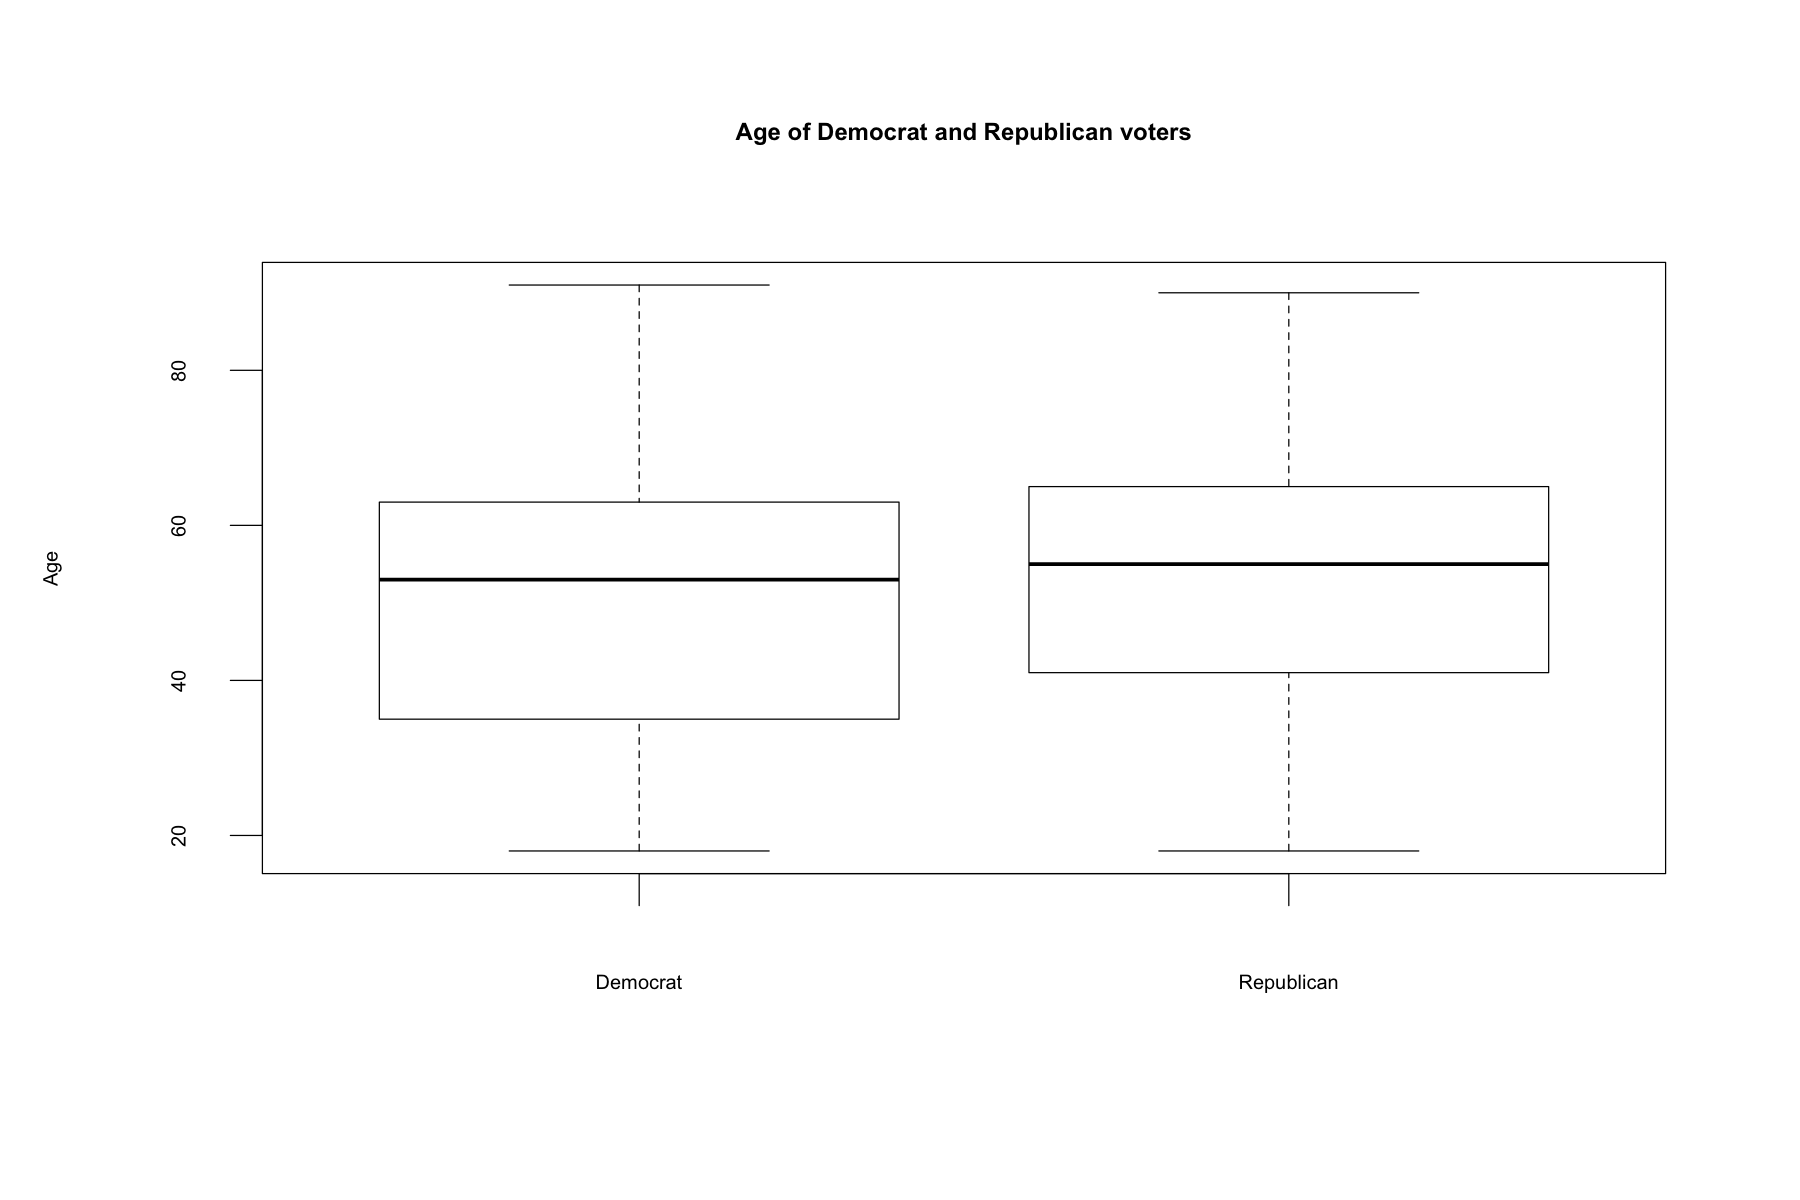

In [12]:
# Boxplot
boxplot(democ$age, repub$age, main = "Age of Democrat and Republican voters", ylab = "Age", names = c("Democrat", "Republican"))

summary(democ$age)
summary(repub$age)

# correlation check
cor(party$age, party$pid7x)

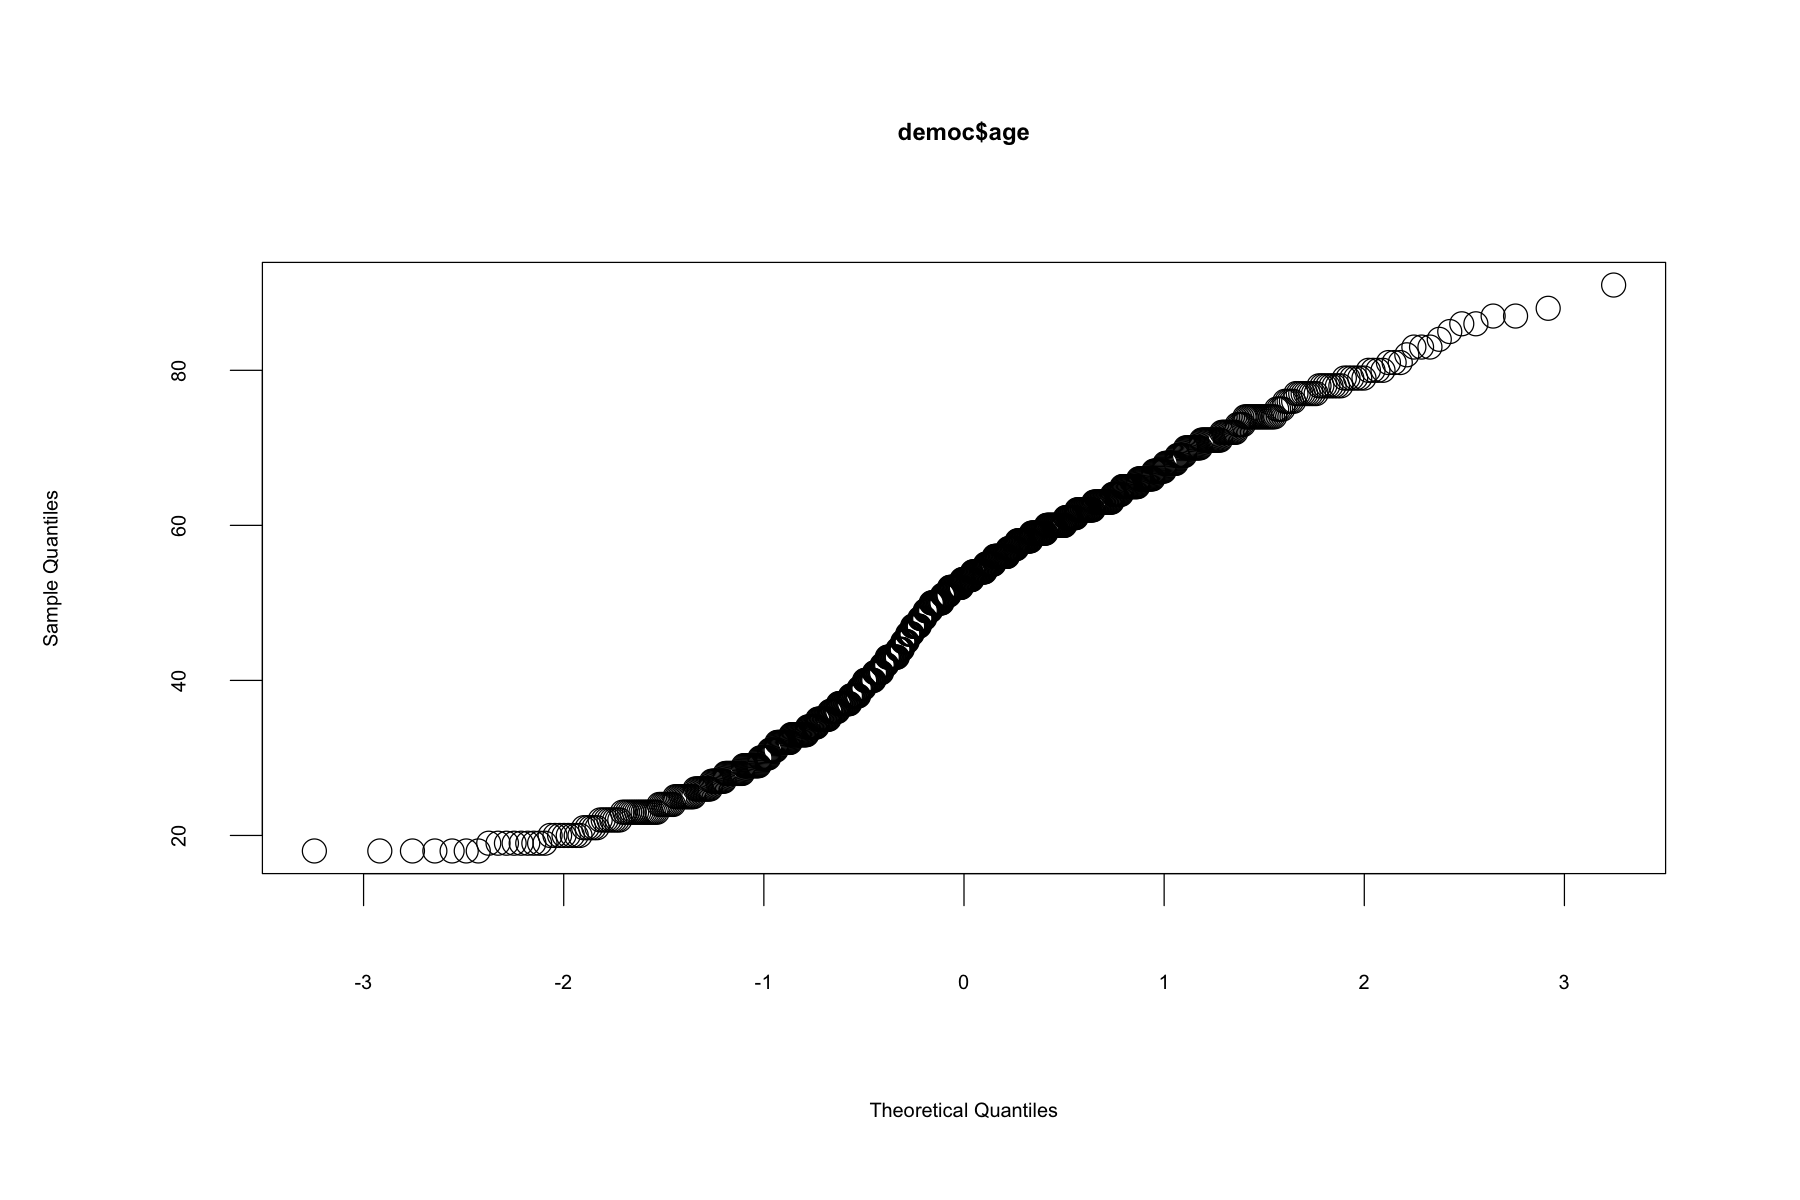

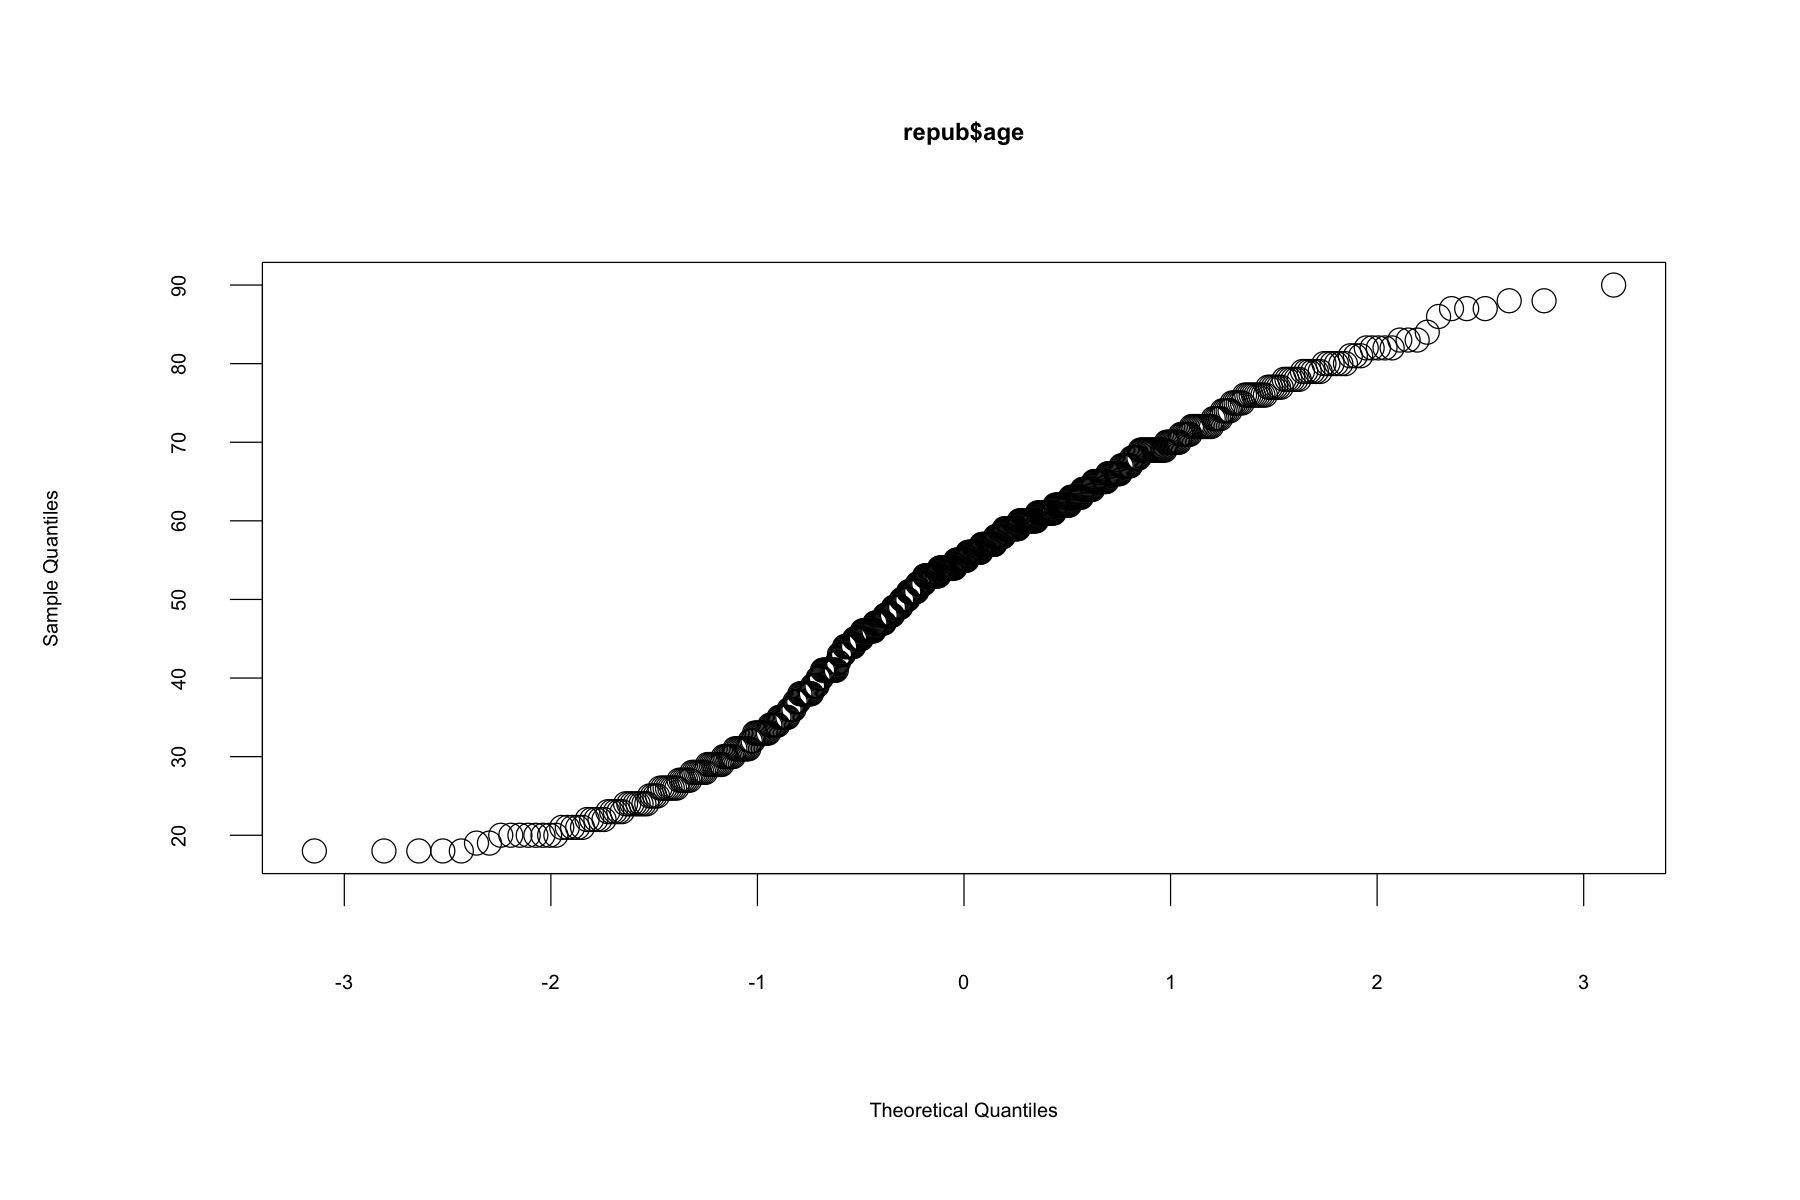

In [13]:
# qq-plot to check for how normal the variables are
qqnorm(democ$age, main = "democ$age")
qqnorm(repub$age, main = "repub$age")

### Based on your EDA, select an appropriate hypothesis test.  (5 points)

>* Considering that there are 1456 observations, the sample size is large enough for CLT to apply, so t-tests (and z-tests) are valid. However, due to some data skewness, a t-test is recommended as it is robust to moderate deviations from normality.
* Assuming that each participant chooses a political party independently, the pid7x variable is taken to be i.i.d. Assuming that age of participant is i.i.d. **and** *pid7x* is independent of age as discussed above, the two variables are considered unpaired.
* With the above observations, a **parametric unpaired two-tailed t-test** is recommended.
* Null hypothesis: The mean age of Republican voters is the same as Democrat voters.
* Alternative hypothesis: The mean age of Republican voters is not the same as Democrat voters.
* We decide to run two-tailed instead of one-tailed t-test because we do not have enough evidence to choose a direction for the test, even though we are interested in answering whether one is higher than the other.
* The null hypothesis will be rejected if the test statistic falls in the rejection region for a p-value of 0.05.

### Conduct your test. (5 points)

In [14]:
# Run unpaired two-tailed t-test
t.test(democ$age, repub$age)

# Calculate the effect size
cohen.d(democ$age, repub$age)


	Welch Two Sample t-test

data:  democ$age and repub$age
t = -3.1132, df = 1295.8, p-value = 0.001891
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.537343 -1.029401
sample estimates:
mean of x mean of y 
 50.21663  53.00000 



Cohen's d

d estimate: -0.1656063 (negligible)
95 percent confidence interval:
      lower       upper 
-0.27017081 -0.06104185 

**Conclusion**
* The p-value of $0.0019$ from the test showed statistical significance and suggests that we should reject the null hypothesis.
* The test lends support towards the alternative hypothesis that there is a difference between the age of Democrat and Republican voters.
* Although the sample size for the test is not small, it is unknown if there is a clustering effect due to the nature of how the survey is conducted, and it is not representative of the US population, so it is a stretch to state that there is a difference in general.

* Cohen's d estimate of $-0.17$ translates to $0.17$ standard deviations apart, which is considered to be of negligible practical significance.

## Question 3: Do a majority of independent voters believe that the federal investigations of Russian election interference are baseless?

### Introduction  (5 points)

> - We would use *pid7x* to determine if a respondent is considered as "independent voter", and *russia16* to determine the respondent's belief in Russian interference. Specifically,
    - Respondents with *pid7x* having values in (3, 4, 5) will be considered as "independent voter". We do recognize that there are other potential variables that could identify "independent voter", such as *pid1d*. However, there are 1,331 cases with "inapplicable, legitimate skip" for *pid1d*, which greatly reduces the sample size. *pid7x* has only 98 non-response cases. We further assume that respondents identify themselves as "3 - Ind, closer to Dem" or "5 - Ind, closer to Rep" are "independent voter" in nature. We acknowledge that this assumption might be undermined if a respondent is registered as a Dem or Rep, however answered 3 or 5 in this question, but we consider such cases as rare. 
    - We assume that respondents answering "2 - This probably did not happen" to *russia16* believe that the federal investigations of Russian election interference are baseless. We understand that there are other potential variables in evaluating this question, such as *muellerinv* and *coord16*. We believe that these questions are relevant to *russia16*, using either of the three variables could help to answer the question. However, there may be situations where respondents believe that the interference did not happen but still support the Mueller's investigation. We found 140 cases with such contradictory responses. They could be a result from untruthful survey response or other factors. However, we do not have strong evidence to remove these seemingly contradictory cases from our analysis. As such, these cases will be kept in our analysis with the understanding that they may underpower our conclusion.  
    - In summary, we subset our data to exclude respondents such that 
        - (1) their *russia16* == -7: No Answer
        - (2) their *pid7x* not in (3, 4, 5): 3 - Ind, closer to Dem; 4 - Independent; 5 - Ind, closer to Rep 
        - (3) their *honest* == 1: Never
- Potential gaps:  
    - In previous sections, we have found that there are respondents who do not always answer honestly. This would underpower our assumptions and analysis. 
    - *pid7x* may not represent what respondents really register as. As mentioned aforehead, if a respondent is registered as a Dem or Rep but answered 3 or 5 to *pid7x*, it would weaken our arguments. 
    - Our analysis assumes that if a respondent believe Russian interference in 2016 election probably did not happen, then he/she would believe that federal investigation may be baseless. However, we realize that this logic might be undermined in cases where respondents believe that the interference did not happen however still support that the federal investigation is not baseless. 

### EDA of the relevant variables. (5 points)

> **1. Sanity checks:**
- The values of *pid7x* include -7, and 1 to 7. We see a high count (579) in pid7x = 1 which corresponds to "Strong Dem", 405 counts of "4 - Independent", and 405 counts of "7 - Strong Rep". 
- The values of *russia16* include -7, 1 and 2. Excluding only 3 counts of "-7 - non-response", we see a relatively even split between "1 - Russia probably interfered" (1,414 cases) and "2 - This probably did not happen" (1,046 cases).  

In [14]:
# 1. Basic data check
summary(A_honest$pid7x)
summary(A_honest$russia16)

count(A_honest, "pid7x")
count(A_honest, "russia16")


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -7.000   1.000   4.000   3.325   5.000   7.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -7.000   1.000   1.000   1.415   2.000   2.000 

pid7x,freq
-7,86
1,579
2,275
3,277
4,405
5,239
6,197
7,405


russia16,freq
-7,3
1,1414
2,1046


> **2. Subset data:** 
- Data is subset from A_honest as done in previous questions.
- There are "-7 - non-response" cases in both variables which will be removed. 
- There are 140 cases where respondents (1) believe that Russia interference did not happen but support Mueller's investigation; or (2) believe that Russia interference did happen but oppose Mueller's investigation. We believe these cases are contradictory but we do not have strong evidence to remove them from our analysis. 
- After subsetting the data, there are 920 obervations.

In [15]:
# 2. Subset data
# Select cases where pid7x in (3,4,5) AND russia16 != -7 
A_q3 = subset(A_honest, pid7x %in% c(3, 4, 5) & russia16 != -7)
A_ind = subset(A_honest, pid7x %in% c(3, 4, 5))

nrow(A_q3)
nrow(A_ind)

# Check on seemingly contradictory cases: 
# (1) believe that Russia interference did not happen but support Mueller's investigation;
# (2) believe that Russia interference did happen but oppose Mueller's investigation
A_contradict = subset(A_honest, (russia16 == 2 & muellerinv %in% c(1, 2)) | 
                      (russia16 == 1 & muellerinv %in% c(6, 7)))

nrow(A_contradict)

[1] 920

[1] 921

[1] 140

> **3. Visualize data:** 
- For detailed analysis, we have broken down respondents' choice on *russia16* by their *pid7x* value. 
- We can see that majority of respondents with pid7x = "3 - Ind, closer to Dem" chose to believe "Russia probably interfered"; whereas majority of respondents with pid7x = "5 - Ind, closer to Rep" chose to believe "This probably did not happen"; and for respondents whose pid7x = "4 - Independent", they are relatively evenly split. This is an interesting finding which may prompt one to analyze how voter's political standing influences his/her belief in Russian interference. 
- This is essentially a Bernoulli distribution where respondent would either choose "1 - Russia probably interfered" or "2 - This probably did not happen".  

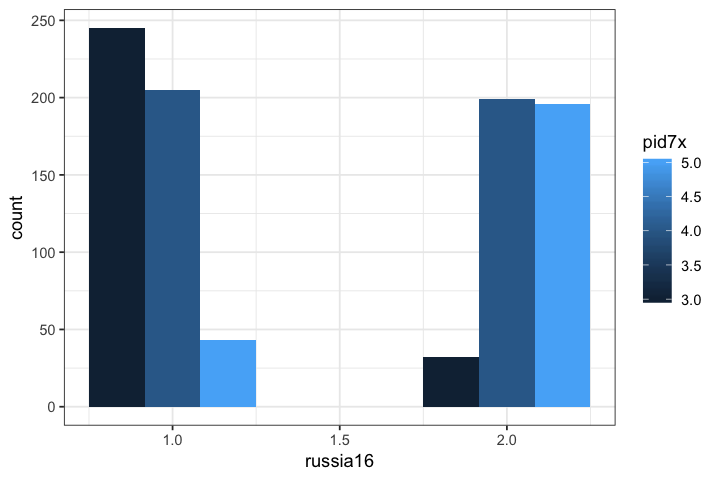

In [16]:
# 3. Data peek through visualization
# Adjust figure size
options(repr.plot.height = 4, repr.plot.width = 6, repr.plot.pointsize = 20)

# Histogram
ggplot(A_q3,aes(x=russia16,group=pid7x,fill=pid7x)) +
  geom_histogram(position="dodge", binwidth = 0.5) + theme_bw() 

### Based on your EDA, select an appropriate hypothesis test.  (5 points)

> - As presented in previous sections, respondents would either choose "1 - Russia probably interfered" or "2 - This probably did not happen". We are interested to see if majority of the respondents choose one over the other. 
- Since all observations in our dataset (A_q3) are considered as "Independent Voters", if there is no preference in one choice over the other, that is, the possibility of selecting 1 equals to the possibility of selecting 2. Under this assumption, the probability would be 50% for either case.  
- Therefore, to test our question of interest, we could construct 
    - Null hypothesis: "The mean of russia16 among independent voters equals to 1.5" 
    - Alternative hypothesis: "The mean of russa16 among independent voters does not equal to 1.5"
- Since we do not have strong argument to support that the distribution of *russia16* follows or is close to normal distribution, t-test will not be valid. Hence, we recommend the non-parametric Wilcoxon test.

### Conduct your test. (5 points)

> - Based on our test, the p value is 0.02956, lower than significance level (0.05). Therfore, it shows statistical significance.  
- The calculated Effect Size is 0.072, indicating its practical significance is small. 
- Conclusion: as p-value is lower than significance level, we could reject the null hypothesis that the mean of russia16 among independent voters equals to 1.5. However, we find certain arguments against the necessary conditions for the test to be valid, such as 
    - (1) we assume all respondents in our dataset A_q3 are "independent voters" but there may be some registered as Dem or Rep voters; 
    - (2) *russia16* may not be a true indicator of voters' support / opposition of Federal investigations in Russian interference; 
    - (3) we remove all non-response cases from our analysis and assume that respondent can either select 1 or 2 for *russia16*. 
    - Therefore, we need caution in supporting our alternative hypothesis. 

In [17]:
# Run Wilcoxon one sample test to test if mu equals to 1.5
wilcox.test(A_q3$russia16, mu = 1.5)

# Calculate effect size
mean_sample = mean(A_q3$russia16)
A_q3$difference <- 1.5 - A_q3$russia16
sd_diff = sd(A_q3$difference)
(effectsize = abs(1.5 - mean_sample)/sd_diff)


	Wilcoxon signed rank test with continuity correction

data:  A_q3$russia16
V = 196630, p-value = 0.02956
alternative hypothesis: true location is not equal to 1.5


[1] 0.07188535

## Question 4: Was anger or fear more effective at driving increases in voter turnout from 2016 to 2018?

### Introduction  (5 points)

>- The variables *turnout16* and *turnout18* would be used to identify the participants that did not vote in 2016, but voted in 2018 to address "increases in voter turnout" in the question.
- From the survey documents, there are a few variables that could reflect the amount of anger and fear of a respondent. Notably, *geangry* and *geafraid* reflect their general state of anger and fear at the time of survey, while *dtangry* and *dtafraid* reflect the state of anger and fear towards Trump's policies. We considered the second set of variables as Trump's policies were introduced in 2016 and could well affect the voting behaviour.

> Potential gaps:
- First, there were many questions that asked about the respondents' state of emotions. It may not be sufficient to look at the response for only one question.
- Voting behaviour is complex and may be driven by more than anger and fear, there are many possible reasons for the change in voter's turnout. Or, it is possible that a voter angry in 2016 remains so in 2018 and did not drive the change in decision to vote in 2018.

### EDA of the relevant variables. (5 points)

####   1. Sanity checks

* It is observed that the *dtangry, dtafraid* set has approximately half the number of valid responses compared to the *geangry, geafraid* set. Hence, we will continue the analysis with the latter set with the bigger sample size.

In [15]:
# Checking for non-response codes
summary(A$turnout18 < 0)
summary(A$turnout16 < 0)

summary(A$dtangry < 0)
summary(A$dtafraid < 0)
summary(A$geangry < 0)
summary(A$geafraid < 0)

   Mode   FALSE 
logical    2500 

   Mode   FALSE 
logical    2500 

   Mode   FALSE    TRUE 
logical    1252    1248 

   Mode   FALSE    TRUE 
logical    1253    1247 

   Mode   FALSE    TRUE 
logical    2497       3 

   Mode   FALSE    TRUE 
logical    2494       6 

####   2. Subset data

* The data is subset from A_honest to identify participants that did not vote in 2016 but voted in 2018 to obtain "increase in voter turnout".
* The final analysis data set has 449 observations.

In [16]:
# Did not vote in 2016 and Voted in 2018
increase = subset(subset(A_honest, A_honest$turnout16 == 2), A$turnout18 <= 3)
dim(increase)

# Remove non-response
final = subset(subset(increase, geangry > 0), geafraid>0)
dim(final)

[1] 1842  767

[1] 449 767

####   3. Visualise data

* A peek at the data is done through histograms and summary of the variables. As the variables are ordered, it is less meaningful to use box plots and qqplots, so they are not used for this question.
* A correlation check is also done between the two variables *geangry* and *geafraid*.

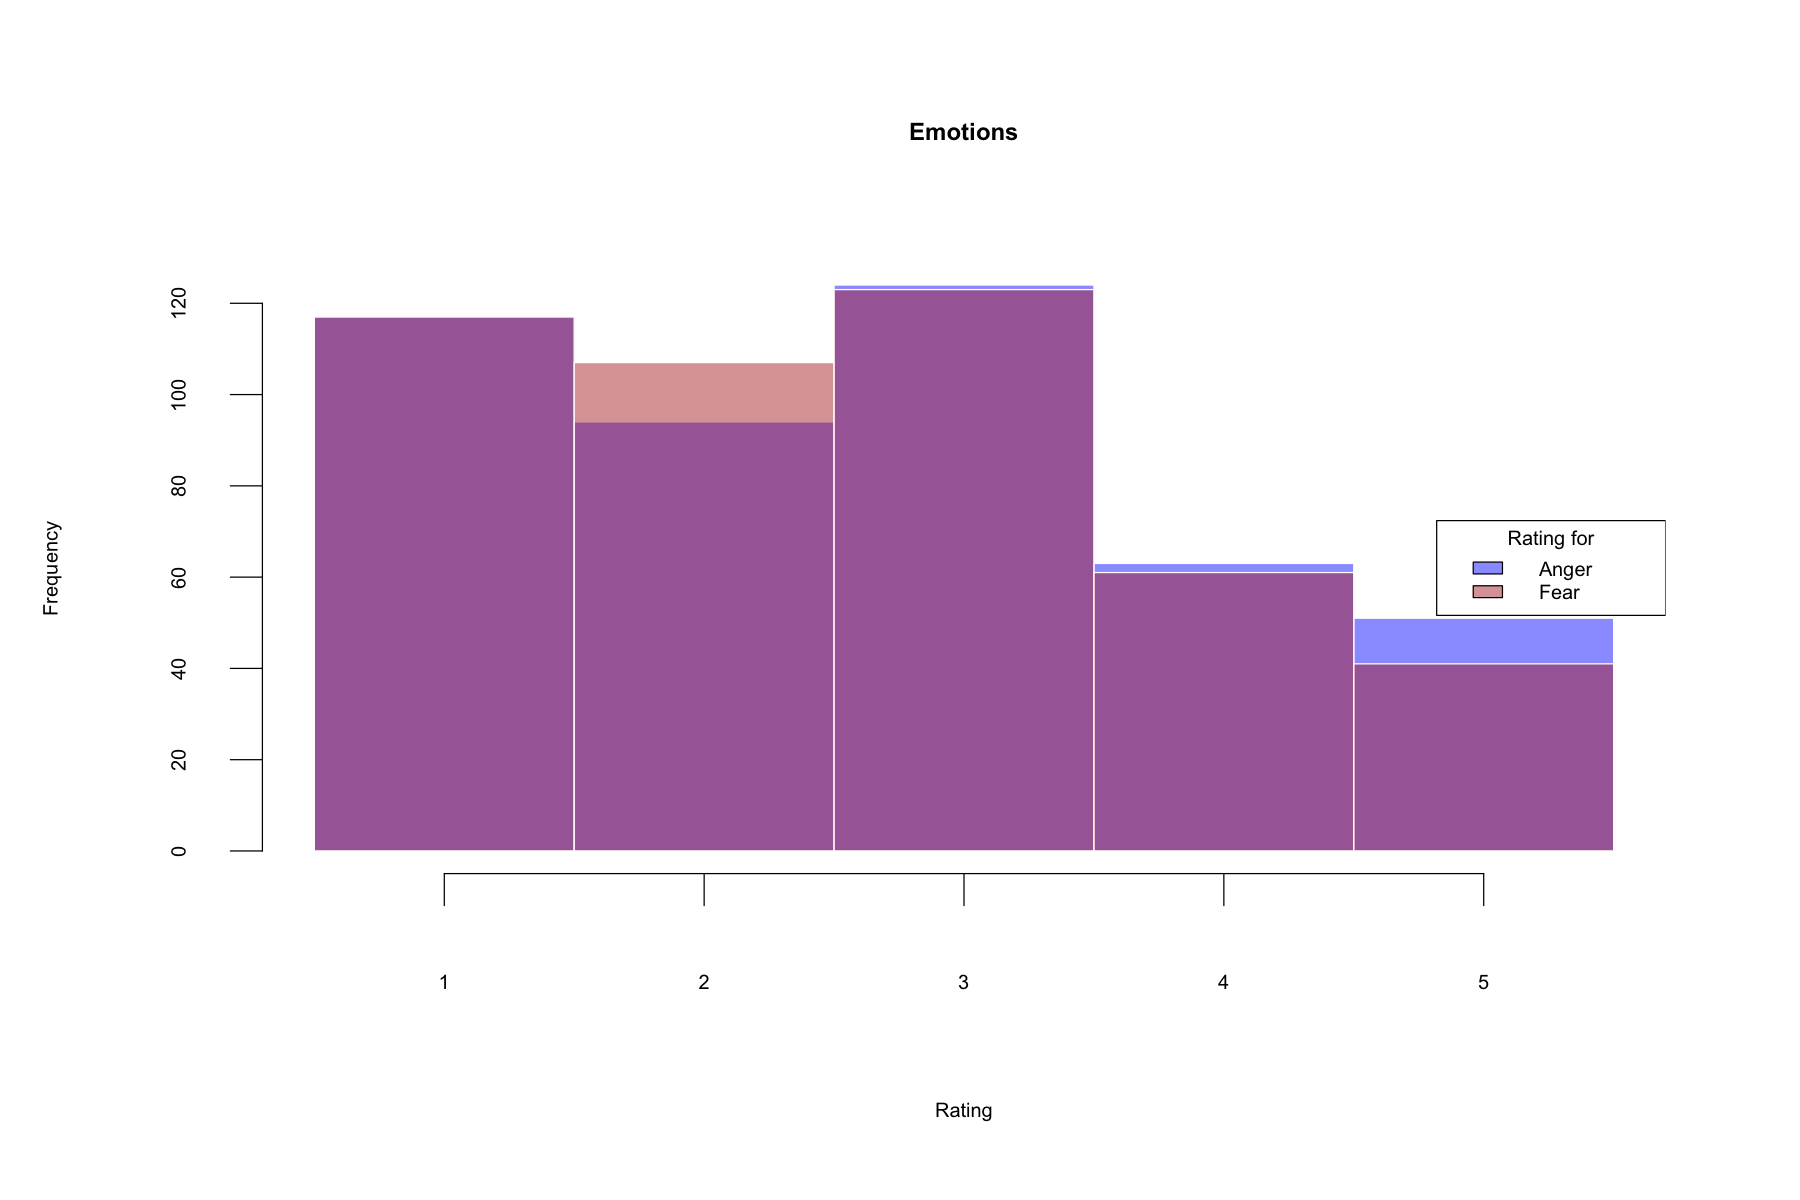

In [17]:
# Adjust figure size
options(repr.plot.height = 10, repr.plot.width = 15, repr.plot.pointsize = 32)

# Histogram 
hist(final$geangry, main = "Emotions", xlab = "Rating", 
     col = "#0000FF75", border = "white", breaks = 1:6 - 0.5)
hist(final$geafraid, add = T, col = "#B2222275", border = "white", breaks = 1:6 - 0.5)
legend("right", title = "Rating for", c("Anger", "Fear"), 
       fill = c("#0000FF75", "#B2222275"))

In [18]:
# Summary 
summary(final$geangry)
summary(final$geafraid)

# Correlation
cor(final$geangry, final$geafraid)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   2.637   4.000   5.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   2.559   3.000   5.000 

[1] 0.5104868

>**Observations**
- From the histogram, both variables do not follow a normal distribution, possibly due to having only 5 choices in the scale. The distributions are also observed to be quite similar. The frequency for "Not at all", "a little" and "somewhat" are higher than "very" and "extremely", skewing the shape of the histogram for both emotions.
- *Before* the data peek, we considered to remove "Not at all" cases since they represent Not angry or Not afraid at all. However, there is a high count of these cases and removal would greatly reduce the sample size which may underpower the analysis. So, these cases would be included. 
- The correlation coefficient of 0.51 suggests moderate correlation between the two variables, which is possible because the emotions come from the same person.

### Based on your EDA, select an appropriate hypothesis test.  (5 points)

>- *geangry* and *geafraid* are ordinal variables with 1 to 5 to represent an increasing amount of emotion. However, the difference between the response "not at all" and "a little" to "very" and "extremely" may not be the same. For this reason, a t-test is not valid and a non-parametric test would be more suitable.
- Next, as discussed in the earlier section, with moderate correlation and emotions from the same respondent, *geangry* and *geafraid* are considered paired and a **Wilcoxon Signed-Rank test** is recommended.
- Null hypothesis: There is no difference between fear and anger in their effectiveness at increasing the voter turnout from 2016 to 2018.
- Alternative hypothesis: There is a difference between fear and anger in their effectiveness at increasing the voter turnout from 2016 to 2018.
- If the p-value is less than 0.05, we would reject the null hypothesis. If the p-value is more than 0.05, we would not reject the null hypothesis.

### Conduct your test. (5 points)

In [19]:
# Wilcoxon signed-rank test
wilcox.test(final$geangry, final$geafraid, paired = T)


	Wilcoxon signed rank test with continuity correction

data:  final$geangry and final$geafraid
V = 18411, p-value = 0.265
alternative hypothesis: true location shift is not equal to 0


**Conclusion**
* The p-value of $0.265$ does not show statistical significance and suggests that we should not reject the null hypothesis.
* The test result lends support towards the hypothesis that there is no difference between fear and anger in their effectiveness at increasing the voter turnout from 2016 to 2018.
* However, we recognise that other variables like *dtangry* and *dtafraid* could show different results in the emotion towards Trump's policies, which were introduced in 2016.
* It is noted that many factors can affect a participant's turnout to change. Anger and fear may not be the only reasons and it is insufficient to study only these two factors.
* Although the sample size for the test is not small, it is unknown if there is a clustering effect, and it is not representative of the US population, so it is a stretch to state that there is no difference in general.

## Question 5: Select a fifth question that you believe is important for understanding the behavior of voters

### Clearly argue for the relevance of this question.  (10 points)

> As the fight over funding for President Trump's border wall intensifies, we would like to explore the following question: 
- **Is there a difference in the opinion of building a wall on the U.S. border with Mexico among democrat, republican and independent voters?**

> We believe this question is important for understanding the recent voting behavior:
- This is a heated debate not only within the White House, but also among various medias. There are very different views on building a wall on the US-Mexico border. We would like to dissect voter groups to get a deeper understanding on how different their opinion of building a border wall is.  
- President Trump is trying to secure a large amount of funding for building a border wall. If approved, funding for other areas would be cut. This would have impact on certain voter groups and their benefits, and thus their voting behavior. 

> - Similar to previous questions, *pid7x* would be used to determine if the respondent belongs to democrat, republican or independent group. They are grouped as follows:
    - Democrat: *pid7x* = 1, 2
    - Independent: *pid7x* = 3, 4, 5
    - Republican: *pid7x* = 6, 7
- The variable *wall* would be used to assess the respondent's opinion towards building a wall. This variable ranges from 1 to 7 to reflect "Favor a great deal" to "Oppose a great deal". It is difficult to assess the differences in "Favor a great deal" to "Favor moderately", so we would also group them into three main categories as follows:
    - "In favor": *wall* = 1, 2, 3
    - "Neither favor nor oppose": *wall* = 4
    - "Oppose": *wall* = 5, 6, 7
   
> Potential gaps:
- As presented in previous sections, not all respondents have provided truthful or accurate responses to the survey.  
- *pid7x* may not represent what respondents really register as.

### Perform EDA and select your hypothesis test (5 points)

> **1. Sanity checks:**
- The values of *pid7x* include -7, and 1 to 7. We see a count of 86 for "-7 - no answer" in pid7x which will be removed. 
- The values of *wall* include 1 to 7. We see high counts on either end of the range: 700 counts of "1 - Favor a great deal", and 922 counts of "7 - Oppose a great deal", suggesting that the subject is of high controversy.   

In [18]:
# 1. Basic data check
summary(A_honest$pid7x)
summary(A_honest$wall)

count(A_honest, "pid7x")
count(A_honest, "wall")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -7.000   1.000   4.000   3.325   5.000   7.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   4.000   4.275   7.000   7.000 

pid7x,freq
-7,86
1,579
2,275
3,277
4,405
5,239
6,197
7,405


wall,freq
1,700
2,154
3,115
4,299
5,112
6,161
7,922


> **2. Subset data:** 
- Data will be subset from A_honest as done previously.
- We also noticed that there are 86 "-7 - non-response" cases in *pid7x* variables which will be removed. 
- We will categorize our data such that there will be 3 political standing based on the values of *pid7x* and there will be 3 types of opinions towards building wall.
- After subsetting our data, there are 2377 obervations.

In [19]:
# Remove non-response
A_q5 = subset(A_honest, pid7x != -7)

# Add a new column "party" to categorize cases into three political standing
A_q5$party[A_q5$pid7x %in% c(1,2)] <- "Democ"
A_q5$party[A_q5$pid7x %in% c(6,7)] <- "Repub"
A_q5$party[A_q5$pid7x %in% c(3,4,5)] <- "Indep"

# Add a new column "partyn" to categorize cases into three political standing 
# with numeric values
# This is equivalent to "party" variable
A_q5$partyn[A_q5$pid7x %in% c(1,2)] <- 1
A_q5$partyn[A_q5$pid7x %in% c(6,7)] <- 3
A_q5$partyn[A_q5$pid7x %in% c(3,4,5)] <- 2

# Add a new column "wallx" to categorize cases into three views towards border wall
A_q5$wallx[A_q5$wall %in% c(1,2,3)] <- "Favor"
A_q5$wallx[A_q5$wall == 4] <- "Neutral"
A_q5$wallx[A_q5$wall %in% c(5,6,7)] <- "Oppose"

# Add a new column "walln" to categorize cases into three views towards border wall 
# with numeric values
# This is equivalent to "wallx" variable
A_q5$walln[A_q5$wall %in% c(1,2,3)] <- 1
A_q5$walln[A_q5$wall == 4] <- 2
A_q5$walln[A_q5$wall %in% c(5,6,7)] <- 3

count(A_q5$party)
count(A_q5$wallx)
nrow(A_q5)

x,freq
Democ,854
Indep,921
Repub,602


x,freq
Favor,952
Neutral,257
Oppose,1168


[1] 2377

> **3. Visualize data:** 
- We create a dataframe to count number of respondents by their *party* and *wallx*. Next, we create a grouped bar plot to see the difference in counts by these groups.  
- The distribution plot revealed that:
    - For Republican respondents, we see spike in counts in "favor of border wall", and low counts in both "Neutral" and "Oppose"; 
    - For Democratic respondents, the spike is evident in "Oppose" border wall category, whereas the counts are low in both "Neutral" and "Favor";
    - For Independent respondents, they are at a certain degree evenly split between "Favor" and "Oppose", and display low count in "Neutral". 


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



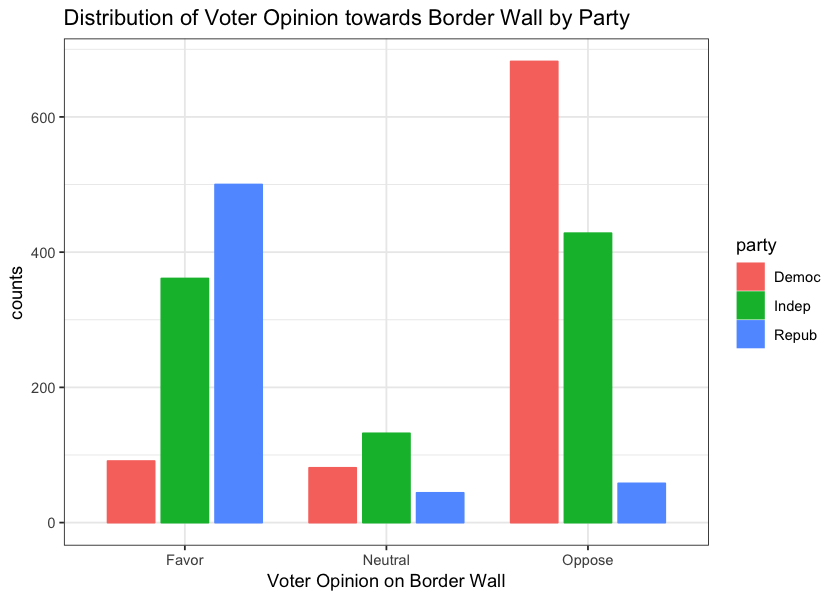

In [20]:
# 3. Data peek through visualization
library(dplyr) 

# Adjust figure size
options(repr.plot.height = 5, repr.plot.width = 7, repr.plot.pointsize = 20)

# Manipulate data for grouped bar plot - group by party and wallx
df <- A_q5 %>%
  group_by(party, wallx) %>%
  summarise(counts = n()) 

# Grouped bar plot - counts by party and wallx
ggplot(df, aes(x = wallx, y = counts)) +
  geom_bar(
    aes(color = party, fill = party),
    stat = "identity", position = position_dodge(0.8),
    width = 0.7
  ) + theme_bw() + ggtitle("Distribution of Voter Opinion towards Border Wall by Party") +
  xlab("Voter Opinion on Border Wall") 


> **4. Select an appropriate hypothesis test:** We decide to run chi-squared test for our analysis based on the following considerations: 
- Our variables of interest *party* and *wallx* are categorical variables. 
- We do not have strong evidence to support that the distribution of either variable is or close to normal distribution.

> Our null hypothesis would be: there **is no** difference in the opinion of building a wall on the U.S. border with Mexico among democrat, republican and independent voters. Our alternative hypothesis would be: there **is** difference in the opinion of building a wall on the U.S. border with Mexico among democrat, republican and independent voters

### Conduct your test. (2 points)

> - Based on our test, the p value is 5.128765e-180, lower than significance level (0.05). Therfore, it shows statistical significance.
- Although our statistical test shows significance, based on our calculated Effect Size which is -0.2284487, it means the practical significance is small.

In [21]:
# Run chi-squared test
CrossTable(A_q5$party, A_q5$wallx,
           prop.r=F, prop.c=F, expected=T,
           chisq=T,
           prop.chisq=F, prop.t=T)

# Calculate effect size using Cohen's d
cohen.d(A_q5$partyn, A_q5$walln)


 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  2377 

 
             | A_q5$wallx 
  A_q5$party |     Favor |   Neutral |    Oppose | Row Total | 
-------------|-----------|-----------|-----------|-----------|
       Democ |        91 |        81 |       682 |       854 | 
             |   342.031 |    92.334 |   419.635 |           | 
             |     0.038 |     0.034 |     0.287 |           | 
-------------|-----------|-----------|-----------|-----------|
       Indep |       361 |       132 |       428 |       921 | 
             |   368.865 |    99.578 |   452.557 |           | 
             |     0.152 |     0.056 |     0.180 |           | 
-------------|-----------|-----------|-----------|-----------|
       Repub |       500 |        44 |        58 |       602 | 
             |   241.104 |    65.088 |   295.808 |           | 
      


Cohen's d

d estimate: -0.2284487 (small)
95 percent confidence interval:
     lower      upper 
-0.2855007 -0.1713967 

### Conclusion (3 points)

> As p-value is lower than 0.05, the test shows statistical significance and suggests that we could reject null hypothesis. The test result lends support towards the alternative hypothesis that there is a difference in the opinion of building a wall on the U.S. border with Mexico among democrat, republican and independent voters. It could be that the opinion regarding the wall is related to the party that they support, since this proposal was brought up by Trump, a member of the Republican party.
It is also noted that the practical significance, as suggested by Cohen's d estimate, is small. 
As we find certain arguments against the necessary conditions for the test to be valid as mentioned in the first section of this question, we need caution in supporting our alternative hypothesis. 
